In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from support.language_models import *
from support.norms import *

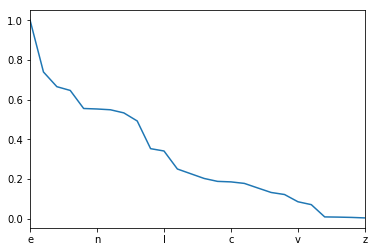

In [29]:
pd.Series(scale(english_counts, linf)).sort_values(ascending=False).plot()

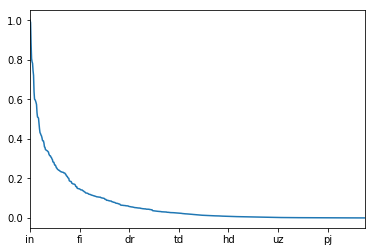

In [30]:
pd.Series(scale(english_bigram_counts, linf)).sort_values(ascending=False).plot()

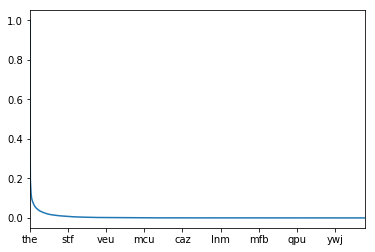

In [31]:
pd.Series(scale(english_trigram_counts, linf)).sort_values(ascending=False).plot()

In [32]:
ug = pd.Series(scale(english_counts, linf)).sort_values(ascending=False).reset_index()
ug.index

RangeIndex(start=0, stop=26, step=1)

In [33]:
bg = pd.Series(scale(english_bigram_counts, linf)).sort_values(ascending=False).reset_index()
bg.index

RangeIndex(start=0, stop=676, step=1)

In [34]:
tg = pd.Series(scale(english_trigram_counts, linf)).sort_values(ascending=False).reset_index()
tg.index

RangeIndex(start=0, stop=17576, step=1)

In [35]:
ugi = pd.RangeIndex(start=0, stop=26**3, step=26**2)
bgi = pd.RangeIndex(start=0, stop=26**3, step=26)
tgi = pd.RangeIndex(start=0, stop=26**3, step=1)
bgi

RangeIndex(start=0, stop=17576, step=26)

In [38]:
ug.index = ugi
bg.index = bgi
tg.head()

,index,0
0,the,1.000000
1,ing,0.532595
2,and,0.529235
3,ion,0.486067
4,tio,0.398344


In [46]:
ubtg = pd.concat([ug, bg, tg], axis=1)
ubtg.fillna(method='pad', inplace=True)
ubtg.head()

,index,0,index,0,index,0
0,e,1.0,in,1.0,the,1.000000
1,e,1.0,in,1.0,ing,0.532595
2,e,1.0,in,1.0,and,0.529235
3,e,1.0,in,1.0,ion,0.486067
4,e,1.0,in,1.0,tio,0.398344


In [49]:
ubtg.columns = ['ug', 'unigrams', 'bg', 'bigrams', 'tg', 'trigrams']
ubtg.head()

,ug,unigrams,bg,bigrams,tg,trigrams
0,e,1.0,in,1.0,the,1.000000
1,e,1.0,in,1.0,ing,0.532595
2,e,1.0,in,1.0,and,0.529235
3,e,1.0,in,1.0,ion,0.486067
4,e,1.0,in,1.0,tio,0.398344


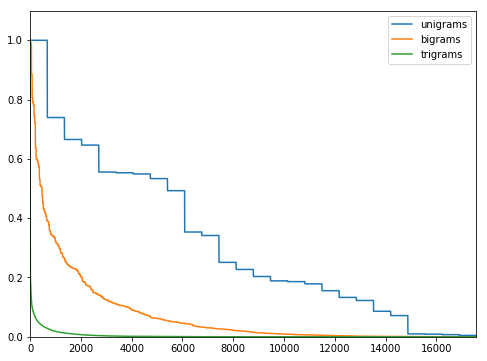

In [60]:
ubtg[['unigrams', 'bigrams', 'trigrams']].plot(figsize=(8, 6), ylim=(0, 1.1))
plt.savefig('blog-images/ubtgram-relative-counts.png')